In [30]:
import pandas as pd

In [31]:
# passo um : importar os arquivos dos dados de cada mês
years = ['23']
months = ['06', '07', '08', '09','10']
months_names = ['Junho', 'Julho', 'Agosto', 'Setembro','Outubro']
labels = ["id_marrital_status","state","city","private_health_plan","status_assinatura","status_onboarding","Problemas Abertos","Mensagens Inbound",
          "Mensagens Outbound","Ligações Inbound","Ligações Outbound","notes_count","done_activities_count","activities_count","Qde Atendimentos Acolhimento",
          "Faltas Acolhimento","Qde Psicoterapia","Faltas Psicoterapia"
          ]
label_groups = {}
df = pd.DataFrame()


# percorre a lista de anos
for y in range(len(years)):
    # percorre a lista de meses
    for m in range(len(months)):

        # lê o .csv do mês correposndente
        df_month = pd.read_csv(f".././data/{months_names[m]}/Ana Health_Tabela Modelo Previsão Churn - Tabela até {months[m]}_{years[y]}.csv",skiprows=1)
        
        # se o df não tive colunas, adicionar elas
        if df.empty:
            df_month.set_index('id_person', inplace=True)
            df = df_month
        else:
            df_month.set_index('id_person', inplace=True)

            # percorre cada uma das colunas
            for label in labels:
                # se a coluna existir no DataFrame
                if label in df_month.columns: 
                    # coloca a coluna no dicionário se não existir    
                    if label not in label_groups.keys():
                        label_groups[label] = []

                    # percorre todos os ids de clientes
                    for id_person in df_month.index:
                        # se o cliente não estiver no DataFrame, coloca ele 
                        if id_person not in df.index:
                            df.loc[id_person] = df_month.loc[id_person]
                        else:
                            if label not in df.columns:
                                # introduce new column woth NA values
                                df[label] = None
                            df.loc[id_person, f"{months[m]} {label}"] = df_month.loc[id_person, label]
                    label_groups[label].append(f"{months[m]} {label}")
        print(df_month.shape) 
              

(1033, 68)
(1072, 68)
(1108, 68)
(1135, 68)


C:\Users\jalfr\AppData\Local\Temp\ipykernel_45476\2114103157.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[id_person, f"{months[m]} {label}"] = df_month.loc[id_person, label]
C:\Users\jalfr\AppData\Local\Temp\ipykernel_45476\2114103157.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[id_person, f"{months[m]} {label}"] = df_month.loc[id_person, label]
C:\Users\jalfr\AppData\Local\Temp\ipykernel_45476\2114103157.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

(1192, 68)


In [32]:
df.head()

,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,contract_end_date,...,10 Mensagens Outbound,10 Ligações Inbound,10 Ligações Outbound,10 notes_count,10 done_activities_count,10 activities_count,10 Qde Atendimentos Acolhimento,10 Faltas Acolhimento,10 Qde Psicoterapia,10 Faltas Psicoterapia
id_person,,,,,,,,,,,,,,,,,,,,,
250,1971-04-01,64.0,82.0,São Paulo,São Paulo,04534-020,417.0,NaN,2021-01-28,NaN,...,38.0,NaN,2.0,1.0,8.0,0.0,1.0,0.0,NaN,NaN
254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,2021-11-18,...,NaN,NaN,NaN,0.0,4.0,0.0,NaN,NaN,NaN,NaN
314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,2021-03-16,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,2021-04-27,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
317,1986-10-14,NaN,NaN,São Paulo,São Paulo,05421-050,NaN,NaN,2021-01-18,2021-03-16,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


state
city


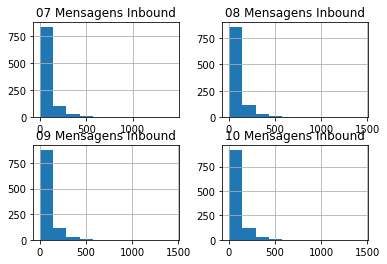

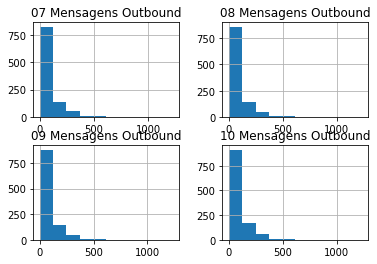

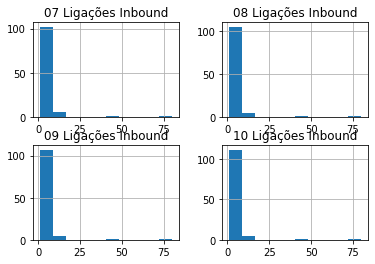

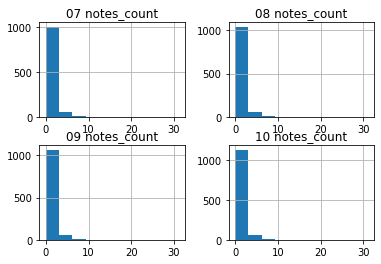

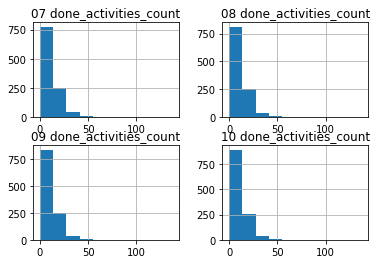

In [35]:
changed_vals = {}

for label in label_groups.keys():
    # make a hist for each user using the label_groups[label] features
    for user in df.index:
        # make a hist from the values in df.loc[user, label_groups[label]]
        changed_vals[label] = False
        for l in range(0, len(label_groups[label])):
            # check if there are equal values in the collumns l
            for lj in range(0, len(label_groups[label])):
                if l != lj:
                    if df.loc[user, label_groups[label][l]] != df.loc[user, label_groups[label][lj]] and not (pd.isna(df.loc[user,label_groups[label][l]])) and not (pd.isna(df.loc[user,label_groups[label][l]])):
                        changed_vals[label] = True
                        break
    if (changed_vals[label] == True):
        try:
            # plot a hist of all labl_groups[label] features
            df[label_groups[label]].hist()
        except:
            print(label)

        

In [36]:
changed_vals

{'id_marrital_status': False,
 'state': True,
 'city': True,
 'Problemas Abertos': False,
 'Mensagens Inbound': True,
 'Mensagens Outbound': True,
 'Ligações Inbound': True,
 'Ligações Outbound': False,
 'notes_count': True,
 'done_activities_count': True,
 'activities_count': False,
 'Qde Atendimentos Acolhimento': False,
 'Faltas Acolhimento': False,
 'Qde Psicoterapia': False,
 'Faltas Psicoterapia': False}

state
city


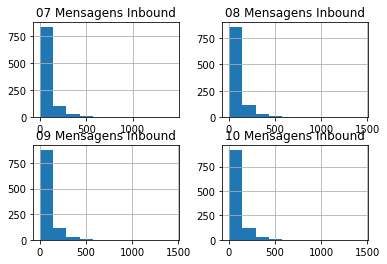

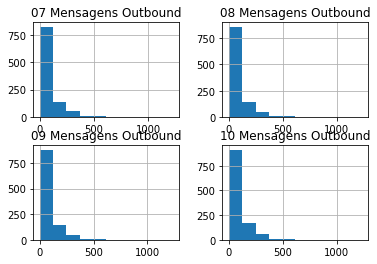

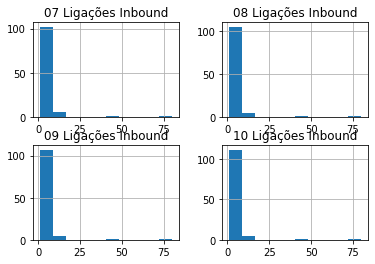

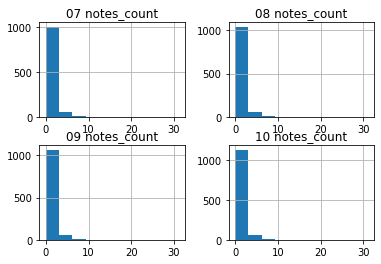

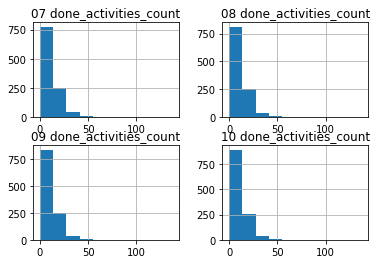

In [37]:
changed_vals = {}

for label in label_groups.keys():
    # make a hist for each user using the label_groups[label] features
    for user in df.index:
        # make a hist from the values in df.loc[user, label_groups[label]]
        changed_vals[label] = False
        for l in range(0, len(label_groups[label])):
            # check if there are equal values in the collumns l
            for lj in range(0, len(label_groups[label])):
                if l != lj:
                    if df.loc[user, label_groups[label][l]] != df.loc[user, label_groups[label][lj]] and not (pd.isna(df.loc[user,label_groups[label][l]])) and not (pd.isna(df.loc[user,label_groups[label][l]])):
                        changed_vals[label] = True
                        break
    if (changed_vals[label] == True):
        try:
            # plot a hist of all labl_groups[label] features
            df[label_groups[label]].hist()
        except:
            print(label)

        

In [38]:
changed_vals

{'id_marrital_status': False,
 'state': True,
 'city': True,
 'Problemas Abertos': False,
 'Mensagens Inbound': True,
 'Mensagens Outbound': True,
 'Ligações Inbound': True,
 'Ligações Outbound': False,
 'notes_count': True,
 'done_activities_count': True,
 'activities_count': False,
 'Qde Atendimentos Acolhimento': False,
 'Faltas Acolhimento': False,
 'Qde Psicoterapia': False,
 'Faltas Psicoterapia': False}